In [93]:
import numpy as np
import matplotlib.pyplot as plt
import collections
import itertools
import random
import math
%matplotlib notebook
import elementary_ca as eca

In [94]:

rule = eca.rule_to_dict(142)

size = 400
state = [0]*size
#state[size // 2] = 1
state = [random.randint(0,1) for _ in range(size)]
state = tuple(state)

In [95]:
states = [state]
for _ in range(2*size):
    states.append(eca.update(states[-1], rule))
states = np.array(states)[size:, :]

<IPython.core.display.Javascript object>


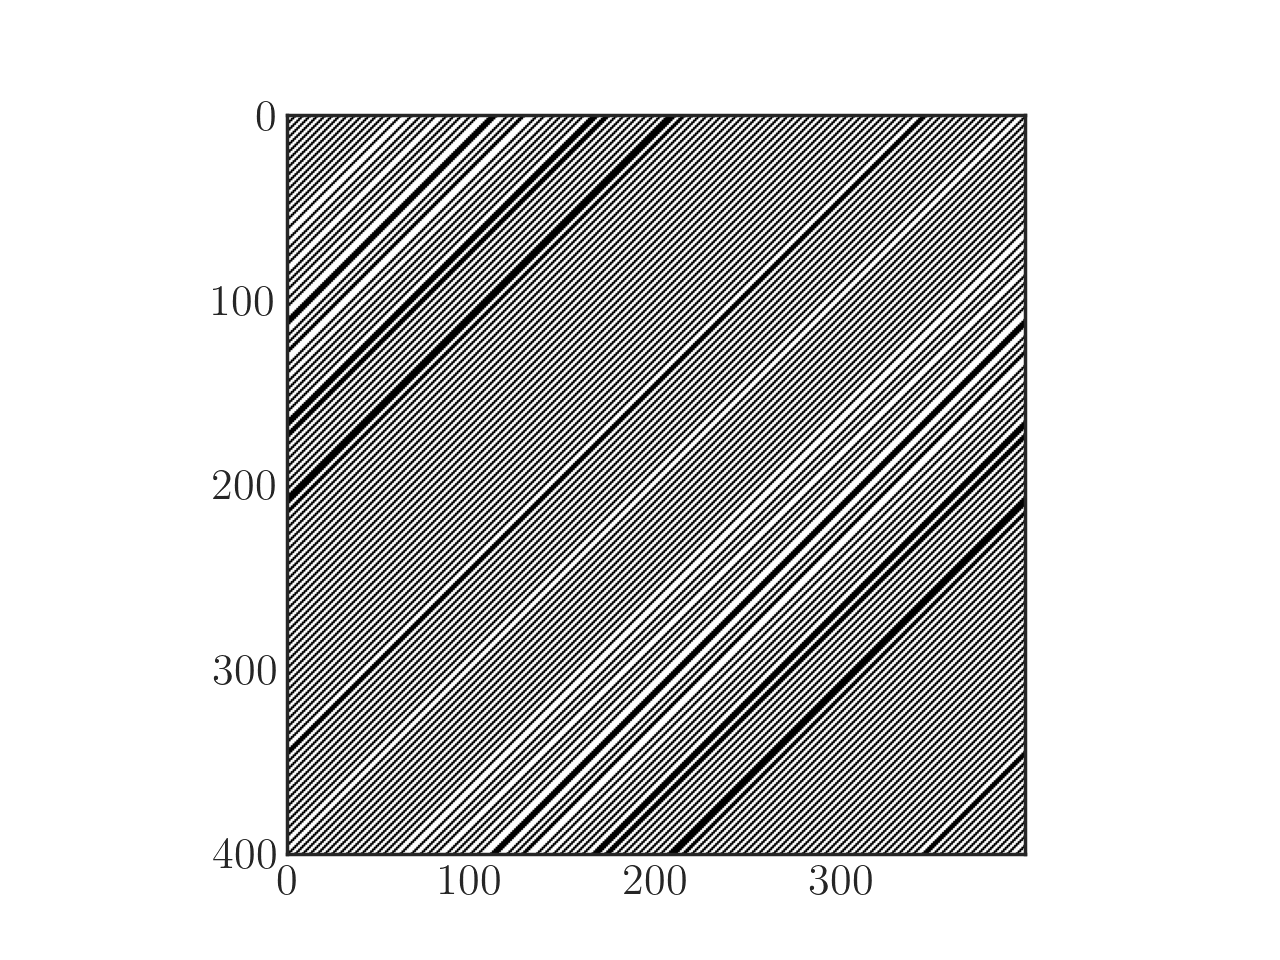

In [96]:
plt.imshow(states)

In [92]:
def mutual_information(states, h, w):
    """
    Compute the mutual information I(X; Y) from the ECA states using variables
    of size (h, 2w) split at the midpoint in the column dimension, so that X
    and Y are of size (h, w)
    """
    cond_counts = collections.defaultdict(collections.Counter)
    rows, cols = states.shape
    dw = 2 * w
    for x in range(0, rows-h):
        for y in range(0, cols-dw):
            cells_l = tuple(states[x:x+h, y:y+w].ravel())
            cells_r = tuple(states[x:x+h, y+w:y+dw].ravel())
            cond_counts[cells_r][cells_l] += 1

    # First compute the conditional entropy: sum_y p(y) sum_x p(x|y) log 1/p(x|y)
    cond_ents = [eca.entropy(xs) for xs in cond_counts.values()]
    cond_ent_sum = sum(cond_ent_y*ny for cond_ent_y, ny in cond_ents)
    y_tot = sum(ny for _, ny in cond_ents)
    cond_ent = cond_ent_sum / y_tot

    # Then compute the entropy: sum_y p(x) log 1 / p(x)
    # Since the x's and ys are essentially the same, we can
    # use the y counts
    ent = eca.entropy(list(ny for _, ny in cond_ents))[0]

    # Return the mutual information I(x, y) = H(x) - H(x|y)
    return ent, cond_ent

In [98]:
sizes = [(1, 1), (1, 2), (1,3), (1, 4)]
#print(mutual_information(states, 1, 3))
#mis = [mutual_information(states, *size) for size in sizes]
print(eca.hic(states, sizes))
#print(mis)

0.8541798398579841
[(0.6930971797265784, 0.689049947833503), (1.3821471275600796, 0.45852705107069697), (1.6258922336103563, 0.6313916680745325), (1.8406741786307776, 0.7866624409373086)]


In [85]:
states[-1, :]

array([1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1,